I have decided to use a water potabilty dataset from kaggle for my portfoliio project.
The reason being that it is a binary classification project that uses a number of 
measurements to predict whether the water is drinkable or not.

##### https://www.kaggle.com/code/imakash3011/water-quality-prediction-7-model/notebook?select=water_potability.csv

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

The file contains the following fields:

1. pH value: PH is an important parameter in evaluating the acid–base balance of water.
2. Hardness: Hardness is mainly caused by calcium and magnesium salts.
3. Solids: Total dissolved solids - TDS.
4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems.
5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks.
6. Conductivity: Pure water is not a good conductor of electric current.
7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources.
8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine.
9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state.
10. Potability: Indicates if water is safe for human consumption where 1 means 'potable' and 0 means 'not potable'.

In [901]:
# The first step is to import some libraries

import numpy as np # linear algebra
import pandas as pd # data processing

In [902]:
# I now read the csv file and make a copy

main_df = pd.read_csv("water_potability.csv")
data_df = main_df.copy()
data_df_PCA = main_df.copy()

In [903]:
# Examining the dataframe...

data_df

# I see that all fields are present, and there are indeed 3276 rows (samples) in the dataset. 
# I also note that there are some missing data (NaN), which I need to deal with later on.


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


I now want to create X and y dataframes that I can use to train and tune my model.

#### Create X and y dataframes

In [906]:
# First off, I create y_df with the Potability column of my original dataframe.

y_df = data_df.Potability

# Check that it worked
#y_df


In [907]:
# Next, I want to remove the Potability column from my original dataframe and assign it to X_df

X_df = data_df.drop("Potability", axis='columns')

# Check that it worked
#print(X_df)

I noted missing data in the original dataset.
Let's see how many missing data points there are in each feature of X_df

In [909]:
X_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

At this point, one way I can deal with missing data is to drop the rows containing any NaN values.
Note: I tried this in a separate notebook (to avoid excessive clutter in this notebook), and the 
model's accuracy, precision and recall didn't improve. Perhaps the dataset became too small when 
I dropped the NaN rows?

Another option is to use imputation to replace NaN with another value. These values could be mean, 
median, mode, etc; however, if I do this before splitting the data into train and test datasets, 
I will introduce dataleakage.

The datafields also have very different scales, so normalisation/standardisation will be necessary. 
Again, I don't want to do this before splitting for the same reason, namely, I will introduce data leakage.

Let's go ahead and split the data into train and test datasets...

#### Train test split before pre-processing to prevent data leakage

In [912]:
# Import the necessary library

from sklearn.model_selection import train_test_split

# Randomly split 30 % of the original dataset into test and the remaining 70 % into train datasets

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=1234)

In [913]:
# Looking at the train dataset to check that the split has worked.

# 2293 random samples from the original dataset out of 3276 samples gives 69.994 %

X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2029,7.560392,223.232250,14739.068540,6.731611,372.028909,481.341774,8.900409,62.134281,4.257805
389,5.477912,211.398844,27361.659066,5.810457,340.623806,358.044130,16.629384,NaN,3.774256
2222,7.301464,205.721880,23778.758719,8.179967,333.339282,529.624618,12.352311,41.032062,3.942709
3176,8.610963,125.158770,32079.774815,9.844921,264.052839,342.205252,12.947376,53.950269,4.614400
1133,7.890354,180.158098,32160.533923,7.773484,360.283983,344.550619,11.246460,60.292187,3.209588
...,...,...,...,...,...,...,...,...,...
664,NaN,188.743562,19037.462638,6.034236,NaN,388.065857,15.149068,78.499418,2.723651
3125,6.103731,184.328693,17977.525649,7.275531,NaN,334.949739,7.655381,59.000666,3.383049
1318,6.724639,223.175415,41552.019664,7.744700,271.157120,463.885216,13.165035,61.058796,2.921415
723,10.137932,242.005716,15088.827653,8.677789,NaN,596.346346,14.971199,62.365824,3.872018


In [914]:
# Convert y_train to pandas dataframe

y_train.to_frame()

,Potability
2029,1
389,1
2222,0
3176,1
1133,1
...,...
664,1
3125,1
1318,0
723,1


In [915]:
# Convert y_test to pandas dataframe

y_test.to_frame()

,Potability
576,0
1712,0
1505,1
118,0
2706,0
...,...
2724,1
1407,0
1646,0
3025,0


Now that I've split the dataset into train and test sets, I can do the necessary pre-processing without worrying about data leakage

#### Pre-process X_train and X_test

#### X_train & y_train

In [919]:
# Counting NaN values in all columns
nan_count = X_train.isna().sum()
print(nan_count)

ph                 342
Hardness             0
Solids               0
Chloramines          0
Sulfate            538
Conductivity         0
Organic_carbon       0
Trihalomethanes    117
Turbidity            0
dtype: int64


Earlier in this notebook, I discussed dealing with missing values. I mentioned that I had tried dropping rows containing NaN.
In this notebook, I will use imputation to replace missing values.

The question arises: what should I replace missing values with? Should the replacements be column specific, i.e. should missing pH values be replaced with the column mean, and missing sulphate values be replaced with the column median?

Should I consider other types of imputation, e.g. hot/cold deck imputation?

##### https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/




In [921]:
# I'll try the three main types of imputation, mean, median and mode to see which, if any, gives better model prediction.

# Calculate the mean, median or mode of each column
mean = X_train.mean()
median = X_train.median()
#mode = X_train.mode() 


# fill NaN values with the mean of each column
X_train.fillna(median, inplace=True)

In [922]:
# Counting NaN values in all columns
nan_count = X_train.isna().sum()
print(nan_count)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


In [923]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2029,7.560392,223.232250,14739.068540,6.731611,372.028909,481.341774,8.900409,62.134281,4.257805
389,5.477912,211.398844,27361.659066,5.810457,340.623806,358.044130,16.629384,66.762190,3.774256
2222,7.301464,205.721880,23778.758719,8.179967,333.339282,529.624618,12.352311,41.032062,3.942709
3176,8.610963,125.158770,32079.774815,9.844921,264.052839,342.205252,12.947376,53.950269,4.614400
1133,7.890354,180.158098,32160.533923,7.773484,360.283983,344.550619,11.246460,60.292187,3.209588
...,...,...,...,...,...,...,...,...,...
664,7.080446,188.743562,19037.462638,6.034236,333.198191,388.065857,15.149068,78.499418,2.723651
3125,6.103731,184.328693,17977.525649,7.275531,333.198191,334.949739,7.655381,59.000666,3.383049
1318,6.724639,223.175415,41552.019664,7.744700,271.157120,463.885216,13.165035,61.058796,2.921415
723,10.137932,242.005716,15088.827653,8.677789,333.198191,596.346346,14.971199,62.365824,3.872018


In [924]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

In [925]:
X_train

,0,1,2,3,4,5,6,7,8
0,0.550776,0.614076,0.236727,0.511528,0.690363,0.569269,0.256721,0.514672,0.530876
1,0.394360,0.565548,0.443973,0.435544,0.601152,0.335193,0.552850,0.553467,0.439451
2,0.531328,0.542267,0.385146,0.631000,0.580459,0.660932,0.388977,0.337777,0.471301
3,0.629685,0.211882,0.521438,0.768338,0.383639,0.305123,0.411777,0.446067,0.598298
4,0.575560,0.437431,0.522764,0.597470,0.657000,0.309576,0.346608,0.499230,0.332688
...,...,...,...,...,...,...,...,...,...
2288,0.514727,0.472640,0.307300,0.454003,0.580058,0.392188,0.496133,0.651857,0.240811
2289,0.441366,0.454535,0.289898,0.556395,0.580058,0.291349,0.209018,0.488403,0.365485
2290,0.488003,0.613843,0.676960,0.595095,0.403820,0.536128,0.420116,0.505656,0.278203
2291,0.744376,0.691066,0.242469,0.672064,0.580058,0.787600,0.489318,0.516613,0.457935


In [926]:
# I appear to have lost my column headings, so I will rename them by index

X_train.rename(columns={X_train.columns[0]: 'pH', X_train.columns[1]: 'Hardness', X_train.columns[2]: 'Solids', 
                          X_train.columns[3]: 'Chloramines', X_train.columns[4]: 'Sulfate', 
                          X_train.columns[5]: 'Conductivity', X_train.columns[6]: 'Organic_carbon', 
                          X_train.columns[7]: 'Trihalomethanes', X_train.columns[8]: 'Turbidity'},inplace=True)

In [927]:
X_train

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.550776,0.614076,0.236727,0.511528,0.690363,0.569269,0.256721,0.514672,0.530876
1,0.394360,0.565548,0.443973,0.435544,0.601152,0.335193,0.552850,0.553467,0.439451
2,0.531328,0.542267,0.385146,0.631000,0.580459,0.660932,0.388977,0.337777,0.471301
3,0.629685,0.211882,0.521438,0.768338,0.383639,0.305123,0.411777,0.446067,0.598298
4,0.575560,0.437431,0.522764,0.597470,0.657000,0.309576,0.346608,0.499230,0.332688
...,...,...,...,...,...,...,...,...,...
2288,0.514727,0.472640,0.307300,0.454003,0.580058,0.392188,0.496133,0.651857,0.240811
2289,0.441366,0.454535,0.289898,0.556395,0.580058,0.291349,0.209018,0.488403,0.365485
2290,0.488003,0.613843,0.676960,0.595095,0.403820,0.536128,0.420116,0.505656,0.278203
2291,0.744376,0.691066,0.242469,0.672064,0.580058,0.787600,0.489318,0.516613,0.457935


In [928]:
y_train

2029    1
389     1
2222    0
3176    1
1133    1
       ..
664     1
3125    1
1318    0
723     1
2863    1
Name: Potability, Length: 2293, dtype: int64

In [929]:
y_train.to_frame()

,Potability
2029,1
389,1
2222,0
3176,1
1133,1
...,...
664,1
3125,1
1318,0
723,1


In [930]:
# Since X_train has new index numbers, I will reset the y_train index too. 

y_train = y_train.reset_index()

In [931]:
y_train

,index,Potability
0,2029,1
1,389,1
2,2222,0
3,3176,1
4,1133,1
...,...,...
2288,664,1
2289,3125,1
2290,1318,0
2291,723,1


In [932]:
y_train = y_train.drop("index", axis='columns')

In [933]:
y_train

,Potability
0,1
1,1
2,0
3,1
4,1
...,...
2288,1
2289,1
2290,0
2291,1


Now I need to repeat the process for X_test and y_test datsaset.

#### X_test & y_test

In [936]:
# Counting NaN values in all columns
nan_count = X_test.isna().sum()
print(nan_count)

ph                 149
Hardness             0
Solids               0
Chloramines          0
Sulfate            243
Conductivity         0
Organic_carbon       0
Trihalomethanes     45
Turbidity            0
dtype: int64


In [937]:
# calculate the mean of each column
mean = X_test.mean()
median = X_test.median()
#mode = X_test.mode()

# fill NaN values with the mean of each column
X_test.fillna(median, inplace=True)

In [938]:
# Counting NaN values in all columns
nan_count = X_test.isna().sum()
print(nan_count)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


In [939]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
576,6.124672,179.579752,27951.613070,8.075627,303.646928,467.171822,13.835117,69.017488,3.631007
1712,5.853561,186.807751,19790.856926,6.615781,332.477743,489.796888,19.670703,65.040007,3.756874
1505,6.931357,190.267367,15255.115258,7.597688,366.192327,418.476742,13.312723,68.944888,3.796737
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,66.139792,3.149158
2706,7.873272,182.646658,25337.122963,3.715065,362.484604,315.189948,12.132425,65.499925,3.306393
...,...,...,...,...,...,...,...,...,...
2724,6.232011,208.668172,12149.696730,8.560039,332.477743,325.344706,13.246995,33.380354,1.641515
1407,8.470546,199.489716,26559.380406,7.904381,351.738925,491.519705,9.504880,66.146355,2.935802
1646,6.179810,248.833263,15391.559151,8.014257,273.086890,487.625733,9.696478,69.697025,3.704324
3025,7.149125,202.582542,23158.389096,6.067812,302.002743,301.984240,17.622595,42.292766,3.787033


In [940]:
X_test = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [941]:
X_test

,0,1,2,3,4,5,6,7,8
0,0.437477,0.479331,0.489420,0.604589,0.416559,0.481314,0.492046,0.523643,0.436313
1,0.418111,0.505549,0.342704,0.490316,0.513851,0.522322,0.795470,0.489183,0.462037
2,0.495097,0.518098,0.261159,0.567177,0.627624,0.393054,0.464883,0.523014,0.470184
3,0.528387,0.272438,0.146098,0.511678,0.207202,0.522421,0.467649,0.498712,0.337837
4,0.562377,0.490456,0.442416,0.263254,0.615112,0.205846,0.403513,0.493168,0.369971
...,...,...,...,...,...,...,...,...,...
978,0.445144,0.584842,0.205329,0.642508,0.513851,0.224252,0.461466,0.214891,0.029718
979,0.605039,0.551549,0.464391,0.591184,0.578849,0.525445,0.266892,0.498768,0.294233
980,0.441415,0.730530,0.263612,0.599785,0.313432,0.518387,0.276855,0.529531,0.451297
981,0.510652,0.562768,0.403247,0.447422,0.411011,0.181911,0.688978,0.292106,0.468200


In [942]:
# Rename column name by index
X_test.rename(columns={X_test.columns[0]: 'pH', X_test.columns[1]: 'Hardness', X_test.columns[2]: 'Solids', 
                          X_test.columns[3]: 'Chloramines', X_test.columns[4]: 'Sulfate', 
                          X_test.columns[5]: 'Conductivity', X_test.columns[6]: 'Organic_carbon', 
                          X_test.columns[7]: 'Trihalomethanes', X_test.columns[8]: 'Turbidity'},inplace=True)

In [943]:
X_test

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.437477,0.479331,0.489420,0.604589,0.416559,0.481314,0.492046,0.523643,0.436313
1,0.418111,0.505549,0.342704,0.490316,0.513851,0.522322,0.795470,0.489183,0.462037
2,0.495097,0.518098,0.261159,0.567177,0.627624,0.393054,0.464883,0.523014,0.470184
3,0.528387,0.272438,0.146098,0.511678,0.207202,0.522421,0.467649,0.498712,0.337837
4,0.562377,0.490456,0.442416,0.263254,0.615112,0.205846,0.403513,0.493168,0.369971
...,...,...,...,...,...,...,...,...,...
978,0.445144,0.584842,0.205329,0.642508,0.513851,0.224252,0.461466,0.214891,0.029718
979,0.605039,0.551549,0.464391,0.591184,0.578849,0.525445,0.266892,0.498768,0.294233
980,0.441415,0.730530,0.263612,0.599785,0.313432,0.518387,0.276855,0.529531,0.451297
981,0.510652,0.562768,0.403247,0.447422,0.411011,0.181911,0.688978,0.292106,0.468200


In [944]:
y_test

576     0
1712    0
1505    1
118     0
2706    0
       ..
2724    1
1407    0
1646    0
3025    0
919     0
Name: Potability, Length: 983, dtype: int64

In [945]:
y_test.to_frame()

,Potability
576,0
1712,0
1505,1
118,0
2706,0
...,...
2724,1
1407,0
1646,0
3025,0


In [946]:
y_test = y_test.reset_index()

In [947]:
y_test

,index,Potability
0,576,0
1,1712,0
2,1505,1
3,118,0
4,2706,0
...,...,...
978,2724,1
979,1407,0
980,1646,0
981,3025,0


In [948]:
y_test = y_test.drop("index", axis='columns')

In [949]:
y_test

,Potability
0,0
1,0
2,1
3,0
4,0
...,...
978,1
979,0
980,0
981,0


Let's visualise the datasets using a histogram plot. I want to see what the distributions look like 
and find out if there are any outliers in my data.

### Visualising the datasets

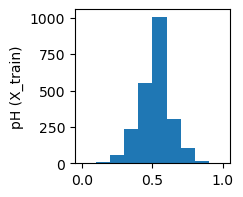

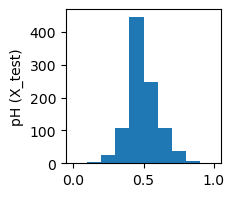

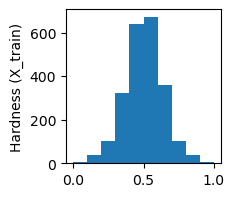

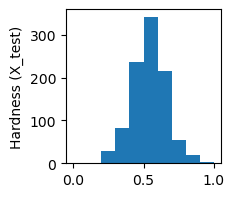

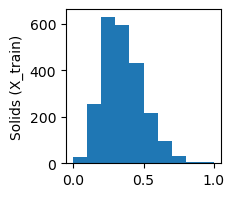

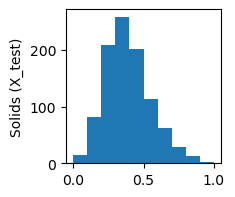

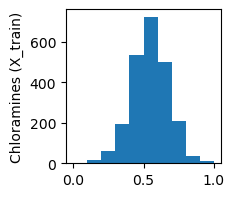

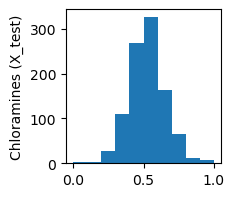

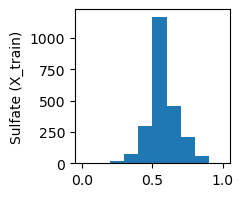

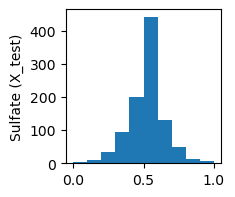

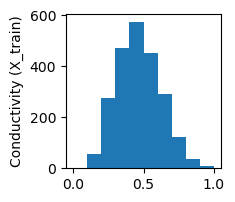

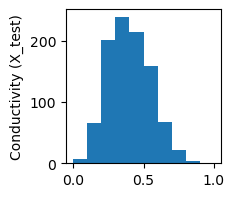

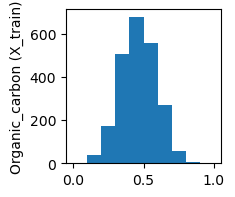

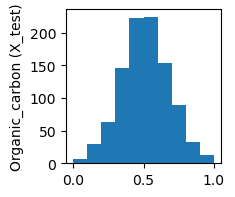

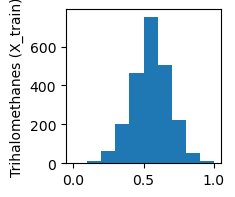

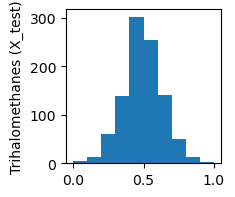

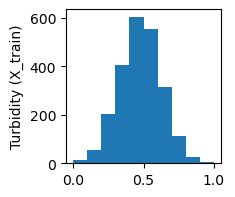

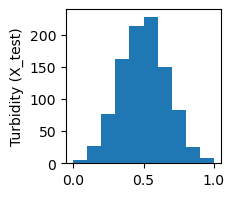

In [952]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.ylabel("pH (X_train)")
plt.hist(X_train.pH)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("pH (X_test)")
plt.hist(X_test.pH)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Hardness (X_train)")
plt.hist(X_train.Hardness)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Hardness (X_test)")
plt.hist(X_test.Hardness)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Solids (X_train)")
plt.hist(X_train.Solids)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Solids (X_test)")
plt.hist(X_test.Solids)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Chloramines (X_train)")
plt.hist(X_train.Chloramines)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Chloramines (X_test)")
plt.hist(X_test.Chloramines)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Sulfate (X_train)")
plt.hist(X_train.Sulfate)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Sulfate (X_test)")
plt.hist(X_test.Sulfate)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Conductivity (X_train)")
plt.hist(X_train.Conductivity)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Conductivity (X_test)")
plt.hist(X_test.Conductivity)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Organic_carbon (X_train)")
plt.hist(X_train.Organic_carbon)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Organic_carbon (X_test)")
plt.hist(X_test.Organic_carbon)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Trihalomethanes (X_train)")
plt.hist(X_train.Trihalomethanes)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Trihalomethanes (X_test)")
plt.hist(X_test.Trihalomethanes)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Turbidity (X_train)")
plt.hist(X_train.Turbidity)
plt.show()

plt.figure(figsize=(2,2))
plt.ylabel("Turbidity (X_test)")
plt.hist(X_test.Turbidity)
plt.show()

I don't see any obvious outliers in the datasets.

Many ML algorithms assume normality in data distribution.
Skewed data distributions can lead to biased models, inaccurate predictions, and suboptimal performance.
##### https://medium.com/@samiraalipour/understanding-and-handling-skewness-in-machine-6e8fc8b15382#:~:text=Skewed%20data%20distributions%20can%20lead,distribution%20or%20balance%20the%20data.

Some of the histograms in my dataset (solids, sulphate and conductivity) are ever so slightly skewed. 
But only very slightly, so I will proceed with my model training.

However, I also want to look at the distribution of my predictors, y_train and y_test...

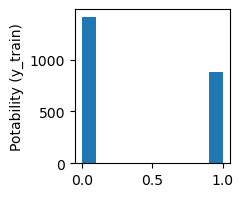

1415
878
y_train potable/not potable: 0.620494699646643


In [954]:
plt.figure(figsize=(2,2))
plt.ylabel("Potability (y_train)")
plt.hist(y_train)
plt.show()

print(y_train.eq(0).all(axis=1).sum())
print(y_train.eq(1).all(axis=1).sum())
print("y_train potable/not potable:", y_train.eq(1).all(axis=1).sum()/y_train.eq(0).all(axis=1).sum())

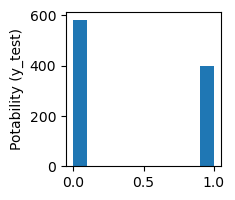

583
400
Ratio y_test potable/not potable: 0.6861063464837049


In [955]:
plt.figure(figsize=(2,2))
plt.ylabel("Potability (y_test)")
plt.hist(y_test)
plt.show()

print(y_test.eq(0).all(axis=1).sum())
print(y_test.eq(1).all(axis=1).sum())
print("Ratio y_test potable/not potable:", y_test.eq(1).all(axis=1).sum()/y_test.eq(0).all(axis=1).sum())

I see that there are more 0 values predictors, i.e. not potable water than there are 1 value predictors (potable).

It is possible to address class imbalances using some form of resampling; however, there are risks involved, so I will keep my data as it is.

##### https://pmc.ncbi.nlm.nih.gov/articles/PMC9382395/#:~:text=Commonly%20suggested%20solutions%20to%20address,(Synthetic%20Minority%20Oversampling%20Technique).

Finally, let's do one final check on the two datasets

In [958]:
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)

Training data shape: (2293, 9) (2293, 1)
Testing data shape: (983, 9) (983, 1)


In [959]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


### PCA

In [1052]:
#Using Principal Dimensional Reduction
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 4)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(pd.DataFrame(explained_variance))

#print(sum(pca.explained_variance_ratio_))

In [1050]:
#           0
# 0  0.276339
# 1  0.259684
# 2  0.245179
# 3  0.218798
# 0.9999999999999998

See Discussion section for comment on PCA

Now let's train a model!

# MODEL TRAINING

I will point out here that I trained and tuned a variety of models earlier (in a different notebook, which I will include in my github repository).
I have summarised accuracy metrics of the models below:

DT = 0.6276703967446592

RF = 0.6520854526958291

SVM = 0.6581892166836215

LogReg = 0.619129

GradBoost = 0.624618514750763

I was dissapointed that with my accuracy scores, so I had a look to see what others had achieved with the same dataset.
I was encouraged to see that my accuracy scores are completely in line with other kaggle members' scores on the same dataset.
I will discuss this more at the end of the notebook.

Looking at my accuracy scores, there's not a lot of difference betwen the models.

What about other metrics? For example, precision and recall?

The predictor in my dataset is potability, i.e. is the water safe or unsafe to drink.
In this case, I'd say that precision is going to be important, since predicting water is safe to drink when it's actually 
unsafe to drink is an undesirable outcome.


DT
Recall: 0.1825
Precision: 0.6517857142857143
RF
Recall: 0.355
Precision: 0.636771300448430

SVM
Recall: 0.255
Precision: 0.7285714285714285
LogReg*
Recall: 0.005
Precision: 1.
*predictions are essentially always 0, i.e. not drinkable

GradBoost
Recall: 0.2775
Precision: 0.5873015873015873

In my opinion, the 4
M

SVM classifier gave the best predictions in terms of accuracy and precision met
So SVM cassifier model is where I e, I will   SVMmy r my portfolio project submis

If I had time, I would investigate other models, such as DNNs. However, looking at what others have done, their 
attempts with neural networks haven't scored any better. They're still in the region of 60-70 % accuracy. sion.

### Support Vector Machine classifier

In [966]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm

#Create a svm Classifier
# I tried three different kernels, but defaul settings (kernel='rbf', C=1, gamma='scale') performed best
svmc = svm.SVC(kernel='rbf') 

#Train the model using the training sets
svmc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svmc.predict(X_test)

In [967]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.6581892166836215
Recall: 0.255
Precision: 0.7285714285714285


Let's look at the confusion matrix to see what's happened.

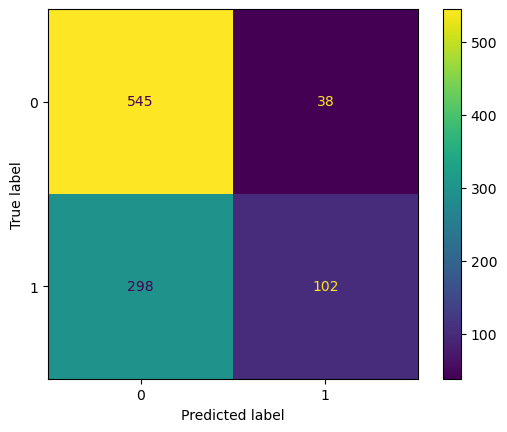

In [969]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

We can see that SVM misclassified a lot of potable samples as not potable. Although this isn't ideal, it's better than misclassifying not potable as potable!

### SVM Hyperparameter tuning

In [972]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [973]:
pip install GPyOpt

Note: you may need to restart the kernel to use updated packages.


For hyperparameter optimisation, I want to investigate Grid Search and Bayesian Optimisation

#### Grid Search

Start by establishing a disctionary of parameters and a search area.

Then I'll do the grid search and print the best fit.

In [977]:
parameters_dictionary = {'kernel':['rbf'], 
                         'C':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10], 
                         'gamma':[1, 10, 'scale']}
svmc = svm.SVC()

grid_search = GridSearchCV(svmc, 
                           parameters_dictionary, 
                           scoring = 'f1',
                           return_train_score=True, 
                           cv = 5,
                           verbose = 1) # Displays how many combinations of parameters and folds 
                                        # we'll have, for more information as the time to run each search, 
                                        # use 2 or 3 values instead of 1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best model was: SVC(C=10, gamma=10)
The best parameter values were: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
The best f1-score was: 0.45666759232767884


I've played around with the parameter dictionary and tested different ranges, but none of them come close to the default settings in terms of accuracy and precision!

So let's give Bayesian Optimisation a try!

#### Bayesian Optimisation

In [981]:
# https://sites.gatech.edu/omscs7641/2024/02/16/tutorial-on-hyperparameter-tuning-using-scikit-learn/

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from GPyOpt.methods import BayesianOptimization
from skopt import BayesSearchCV, space, plots
from sklearn.svm import SVC

# Bayesian Search search space
search_spaces = {
    'C': (1e-2, 1e2, 'log-uniform'),
    'gamma': (1e-2, 1e2, 'log-uniform'),
    'kernel': ['rbf']
}

bayes_opt = BayesSearchCV(
    SVC(),
    search_spaces=search_spaces,
    n_iter=81,
    cv=5,
    n_jobs=4
)

bayes_opt.fit(X_train, y_train)
print(f'Best Params: {bayes_opt.best_params_}')

y_pred = bayes_opt.predict(X_test)
print(classification_report(y_test, y_pred))

Best Params: OrderedDict({'C': 23.41332112903636, 'gamma': 1.7102665528341037, 'kernel': 'rbf'})
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       583
           1       0.62      0.31      0.41       400

    accuracy                           0.64       983
   macro avg       0.63      0.59      0.58       983
weighted avg       0.64      0.64      0.61       983



### Discussion

At first, I was disappointed with my model performances. I thought I'd missed something or done something wrong.

I had plenty of time to abandon this dataset and look for something that would allow me to achieve a much better test set accuracy. However, the more I thought about it, the more I realised that this dataset offers some really good learning and discussion points.

Therefore, I decided to look at what others had done. It was only at that point that I realised that my model performances weren't bad at all.
They were actually on-par with what others had done! I've summarised some of the other users' results in the next cell. Some of the users achieved very slightly (1-2 %) better accuracies, so I looked at their code and saw that they had pre-processed their datasets prior to splitting. I've already discussed why I chose not to do this. Rather, my approach was to split first, then pre-process.

I pondered why we all might be getting such poor accuracies, etc. So, I looked more at the dataset. Where did it come from? There is precious little information regarding the dataset, apart from a description of the input features.

One glaring question was regarding the predictor, potability. How was it determined? 

##### No methods are mentioned on the (About this Dataset) section on the kaggle site.

I did a quick google search to find out more about potability testing.

A commonly used method is the Coliform-Test-Technique (Multiple-Tube Fermentation Test), which is a standard method followed all over the world to determine whether the water is potable or faecally polluted [1]. This is a bacteria test, where a test result of ‘Absent’ indicates the well or distribution system is free of coliform bacterial contamination, and is therefore considered potable with respect to bacteria.

Are there any other metrics that are used to test for potability? I only know that dataset consists of input features: pH, hardness, solids, chloramines, sulphate, conductivity, organic carbon, trihalomethanes, and turbidity. Organic carbon may indicate some sort of bactria test, but who knows! It may be that the test for potability was a taste test, in which case it becomes very subjective.

I tried dimentionality reduction (PCA) to see if I could get my models to perform any better. Unfortunately, PCA appears to confirm that the dataset is probably bogus, since all variance ratios of all four principal components are roughly the same.

This exercise has highlighted the importance of creating and maintaining good data and model cards.

I have learned a lot from this dataset. In future, my first task will always be to examine and scrutinise the data. Where has it come from? How large is the dataset? The dataset could definitely have done with being much larger, especially given the difficulty in training models with good accuracy.

I will apply this hindsight to any professional work that I do in machine learning. I cannot produce good models if the data is garbage!

#### References

[1] https://www.biologydiscussion.com/water-microbiology/determining-potability-of-water-water-microbiology/55536



### Other users' results on this same dataset


#### joefred101

##### Accuracy:
DT = 0.641015; RF = 0.655270; SVC = 0.674803
##### Precision:
SVC = 0.686933
##### Recall:
SVC = 0.674803

##### https://www.kaggle.com/code/joefred101/water-quality-classification-modeling

#### Karthik
##### Accuracy
DT = 0.6104218362282878; RF = 0.7096774193548387; SVM = 0.724565756823821; LogReg = 0.6178660049627791
##### https://www.kaggle.com/code/karthikreddy77/water-quality-prediction-with-all-classifications

#### sadık oktay bicici
##### Accuracy
RF = 0.6683485384472165
##### https://www.kaggle.com/code/sadkoktaybicici/su-kalitesi-veri-analizi

#### Lea Ben Zvi
##### Accuracy
RF = 0.655448717948718
##### https://www.kaggle.com/code/leabenzvi/water-potability-classification

#### Ashfak Yeafi 
##### Accuracy
LogReg = 0.607245; RF = 0.646330; DT = 0.586273
##### https://www.kaggle.com/code/ashfakyeafi/random-forest-with-water-quality